In [15]:
import geopandas as gpd
import pandas as pd
import rasterio as rio
import urbanpy as up
import glob
from shapely.geometry import box
from rasterio.plot import show

In [4]:
ls_dem_tifs = glob.glob('outputs/DEM_rasters/*_dem.tif')

In [22]:
def raster_bounds_to_poly(fn):
    raster = rio.open(fn)
    bbox = box(*raster.bounds)
    return {'filename': fn, 'geometry': bbox}

In [32]:
raster_bounds = list(map(raster_bounds_to_poly, ls_dem_tifs))

In [33]:
raster_bounds_gdf = gpd.GeoDataFrame(raster_bounds)

<AxesSubplot:>

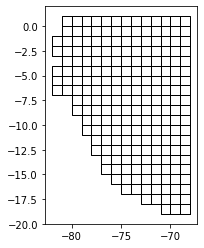

In [36]:
raster_bounds_gdf.plot(facecolor='none')

In [37]:
peru = up.download.nominatim_osm('Peru')

In [41]:
raster_bounds_peru_gdf = raster_bounds_gdf.clip(peru)

<AxesSubplot:>

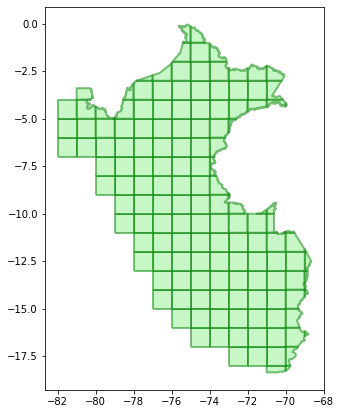

In [46]:
raster_bounds_peru_gdf.plot(figsize=(5,7.5), color='lightgreen', alpha=0.5, edgecolor='green', linewidth=2)

In [47]:
raster_bounds_peru_gdf.to_file('outputs/raster_bounds_peru.geojson', driver='GeoJSON')

/Users/claudio/.pyenv/versions/peru-connect-env/lib/python3.9/site-packages/geopandas/io/file.py:362: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  pd.Int64Index,
